In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus
from IPython.display import Image, display
from sklearn import tree

from collections import Counter
from sklearn import metrics
from sklearn.metrics import f1_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier

from collections import Counter

In [3]:
titanic_data = pd.read_csv("train_data_modeling.csv")

In [4]:
titanic_data.head(10)

,PassengerId,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,1,0,-0.606407,-0.502445,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1,2,1,0.624364,0.786845,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,3,1,-0.298714,-0.488854,0,0,1,1,0,1,...,1,0,0,0,0,0,0,0,0,1
3,4,1,0.393594,0.420730,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,5,0,0.393594,-0.486337,0,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,1
5,6,0,0.057146,-0.478116,0,0,1,0,1,1,...,1,0,0,0,0,0,0,0,1,0
6,7,0,1.855135,0.395814,1,0,0,0,1,1,...,1,0,0,0,0,0,0,0,0,1
7,8,0,-2.144871,-0.224083,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
8,9,1,-0.221791,-0.424256,0,0,1,1,0,1,...,0,0,1,0,0,0,0,0,0,1
9,10,1,-1.221793,-0.042956,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [5]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Age', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2',
       'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1',
       'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

### Spliting the data

In [6]:
X=titanic_data.drop("Survived",axis=1)
y= titanic_data["Survived"]

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size =0.3, random_state=None)
# stratify=y

In [8]:
X_train.shape, y_train.shape

((623, 25), (623,))

In [9]:
X_test.shape, y_test.shape

((268, 25), (268,))

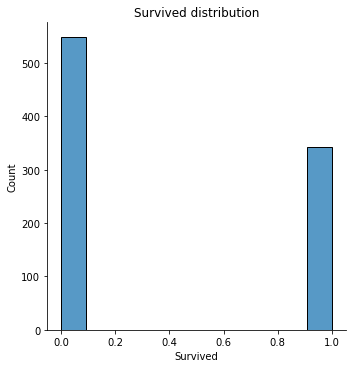

In [10]:
sns.displot(titanic_data,x="Survived")
plt.title("Survived distribution")
plt.show()

In [11]:
"""Cross validation function"""

def get_score(model, X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

# Training and selection  the  best model

### Decision tree classifier

In [12]:
Kf5= KFold(n_splits=5, random_state=None,shuffle=True)

In [13]:
dtree = DecisionTreeClassifier()

In [14]:

Counter(y_train)
Counter(y_test)

Counter({1: 113, 0: 155})

In [15]:
params = {
    "max_depth": [1, 5, 7,9, 15, 20],
    "min_samples_leaf": [1,2, 5, 10, 12],
    "max_leaf_nodes": [5, 10, 20,30,50]
}

In [16]:
grid_search = GridSearchCV(estimator=dtree, param_grid=params)
grid_search.fit(X_train,y_train)
tree_classifier = grid_search.best_estimator_
tree_score = grid_search.score(X_test,y_test)
print(tree_classifier)
print(tree_score)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10, min_samples_leaf=10)
0.7798507462686567


In [17]:
tree_classifier.fit(X_train,y_train)
y_pred_tree = tree_classifier.predict(X_test)

In [18]:
confusion_matrix_tree = confusion_matrix(y_test,y_pred_tree)
print('Confusion matrix:')
print(f'True positives: {confusion_matrix_tree[0][0]}')
print(f'False negative: {confusion_matrix_tree[0][1]}')
print(f'True negative: {confusion_matrix_tree[1][0]}')
print(f'False positive: {confusion_matrix_tree[1][1]}')

Confusion matrix:
True positives: 136
False negative: 19
True negative: 40
False positive: 73


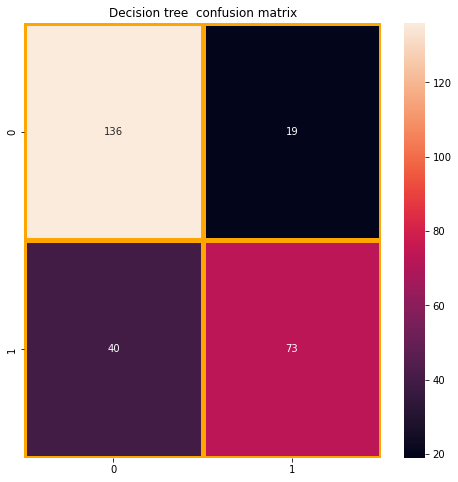

In [19]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix_tree,annot= True, fmt = "d", linecolor="orange",linewidths=5)
plt.title("Decision tree  confusion matrix")
plt.show()

In [20]:
tree_f1_score = f1_score(y_test,y_pred_tree,average="weighted")
tree_f1_score

0.7755583954811454

In [21]:
print(classification_report(y_test,y_pred_tree))

              precision    recall  f1-score   support

           0       0.77      0.88      0.82       155
           1       0.79      0.65      0.71       113

    accuracy                           0.78       268
   macro avg       0.78      0.76      0.77       268
weighted avg       0.78      0.78      0.78       268



In [22]:
"""Cross validation"""
for train_index,test_index in Kf5.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test= y.iloc[test_index]
    
    print(get_score(tree_classifier,X_train,X_test,y_train,y_test))

0.770949720670391
0.7865168539325843
0.7921348314606742
0.8314606741573034
0.7640449438202247


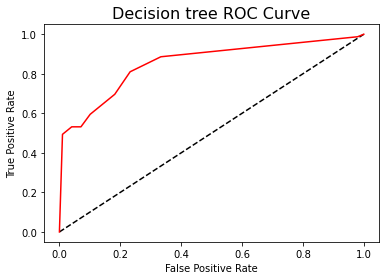

In [23]:
y_pred_prob = tree_classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Decision tree',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision tree ROC Curve',fontsize=16)
plt.show()

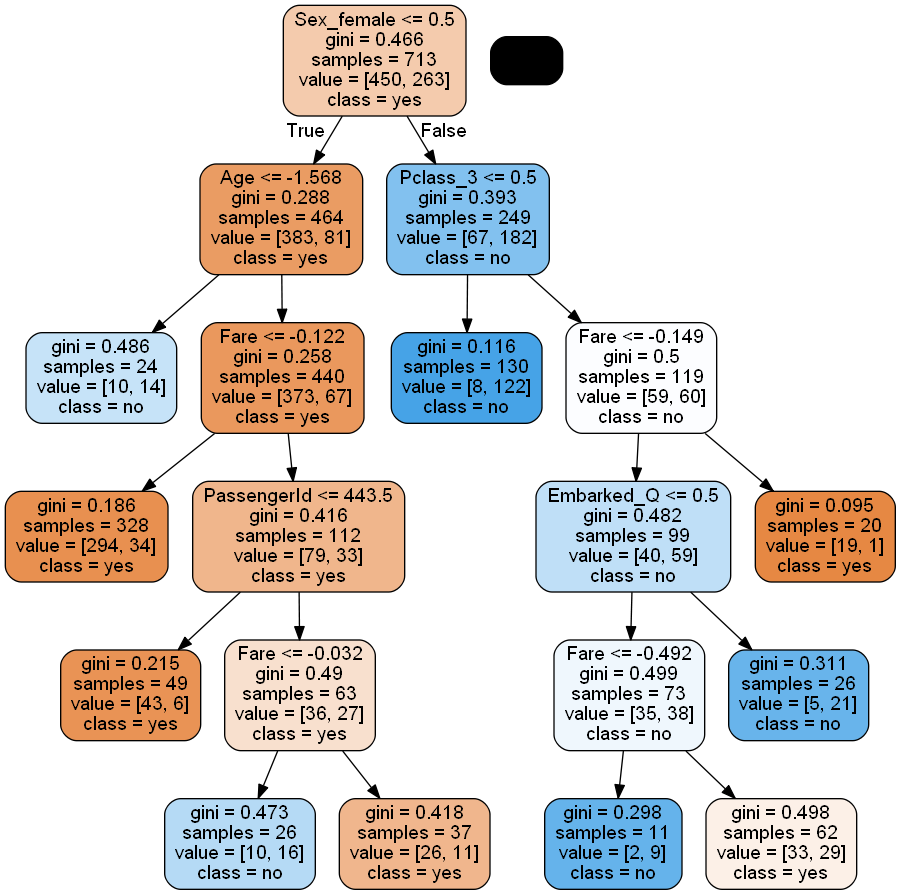

In [24]:
ddata = tree.export_graphviz(tree_classifier, out_file=None, filled= True, rounded= True,
                            feature_names=['PassengerId', 'Age', 'Fare', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp_0', 'SibSp_1', 'SibSp_2',
       'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8', 'Parch_0', 'Parch_1',
       'Parch_2', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
                            class_names=["yes","no"])
graph=pydotplus.graph_from_dot_data(ddata)
display(Image(graph.create_png()))

## Random forest classifier

In [25]:
RF= RandomForestClassifier()

In [26]:

Counter(y_train)
Counter(y_test)

Counter({0: 99, 1: 79})

In [27]:
params = {
    "n_estimators": [150,250,500],
    "max_depth" : [15,20,60,70,80,90],
    "max_leaf_nodes" : [10,15,20,30,40,50,60]
    
    
}


In [28]:
grid_search = GridSearchCV(estimator=RF, param_grid=params)
grid_search.fit(X_train,y_train)
RF_classifier = grid_search.best_estimator_
print(RF_classifier)
RF_score= grid_search.score(X_test,y_test)
print(RF_score)
# RandomForestClassifier(max_depth=15, max_leaf_nodes=60, n_estimators=150)

RandomForestClassifier(max_depth=15, max_leaf_nodes=40, n_estimators=150)
0.8033707865168539


In [29]:
RF_classifier.fit(X_train,y_train)
y_pred_RF= RF_classifier.predict(X_test)
RF_classifier.score(X_test,y_test)

0.8202247191011236

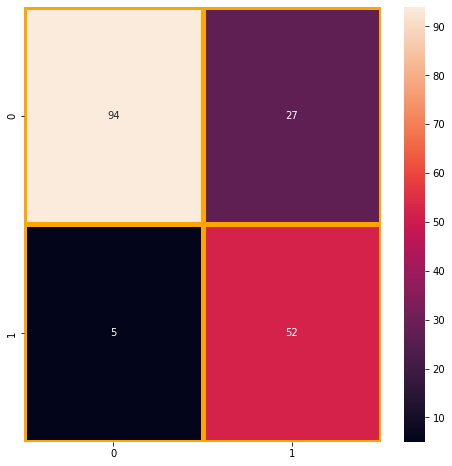

In [30]:
plt.figure(figsize =(8,8))
sns.heatmap(confusion_matrix(y_pred_RF,y_test),
           annot=True, fmt ="d",linecolor="orange",linewidths=5)
plt.show()

In [31]:
print(classification_report(y_test,y_pred_RF))

              precision    recall  f1-score   support

           0       0.78      0.95      0.85        99
           1       0.91      0.66      0.76        79

    accuracy                           0.82       178
   macro avg       0.84      0.80      0.81       178
weighted avg       0.84      0.82      0.81       178



In [32]:
RF_f1_score = f1_score(y_test,y_pred_RF, average="weighted")
RF_f1_score

0.8146728354263054

In [33]:
"""Cross validation"""
for train_index,test_index in Kf5.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test= y.iloc[test_index]
    
    print(get_score(RF_classifier,X_train,X_test,y_train,y_test))

0.8212290502793296
0.8146067415730337
0.8033707865168539
0.7921348314606742
0.848314606741573


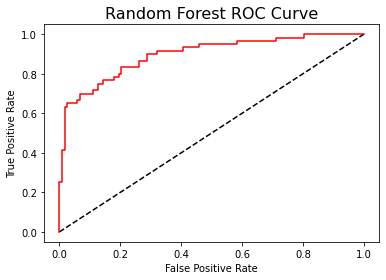

In [34]:
y_pred_prob = RF_classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show()

## Logistic regression

In [35]:
LR= LogisticRegression()

In [36]:

Counter(y_train)
Counter(y_test)

Counter({0: 118, 1: 60})

In [37]:
params= {
    "C" : [0.001, 0.1,1,10,20,50,70,100],
    "fit_intercept" : [True,False],
    "max_iter" : [5000,7000,10000,15000,20000]
}

In [38]:
grid_search_LR= GridSearchCV(estimator = LR, param_grid=params)
grid_search_LR.fit(X_train,y_train)
LR_classifier = grid_search_LR.best_estimator_
print(LR_classifier)


LogisticRegression(C=10, max_iter=5000)


In [39]:
LR_classifier.fit(X_train,y_train)
print(LR_classifier.score(X_test,y_test))
y_pred_LR=LR_classifier.predict(X_test)

0.8089887640449438


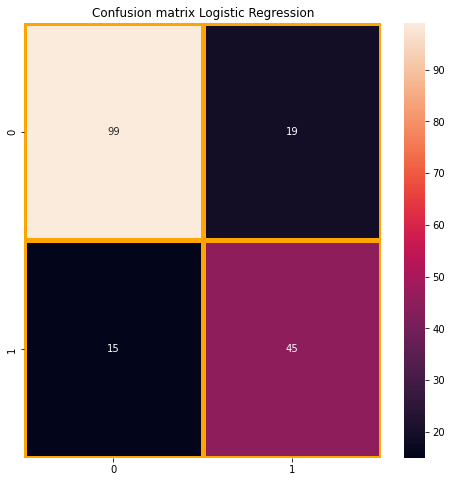

In [40]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred_LR),
           annot=True,fmt="d",linecolor="orange",linewidths=5)
plt.title("Confusion matrix Logistic Regression")
plt.show()

In [41]:
print(classification_report(y_test,y_pred_LR))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85       118
           1       0.70      0.75      0.73        60

    accuracy                           0.81       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178



In [42]:
LR_f1_score= f1_score(y_pred_LR,y_test,average="weighted")
LR_f1_score


0.8075545862443914

In [43]:
# y_pred_LR

In [44]:
"""Cross validation"""

for train_index,test_index in Kf5.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test= y.iloc[test_index]
    
    print(get_score(LR_classifier,X_train,X_test,y_train,y_test))

0.7653631284916201
0.8089887640449438
0.8651685393258427
0.7921348314606742
0.7865168539325843


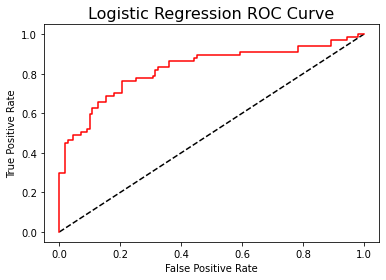

In [45]:
y_pred_prob = LR_classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show()

## KNN

In [46]:
KNN = KNeighborsClassifier()

In [47]:

Counter(y_train)
Counter(y_test)

Counter({1: 67, 0: 111})

In [48]:
params = {
   "n_neighbors" : [ 1, 5, 10,15,100]}
    

In [49]:

grid_search_KNN = GridSearchCV(estimator = KNN, param_grid=params)
grid_search_KNN.fit(X_train,y_train)
KN_classifier = grid_search_KNN.best_estimator_
print(KN_classifier)

KNeighborsClassifier(n_neighbors=100)


In [50]:

y_pred_KN =KN_classifier.predict(X_test)
KN_classifier.score(X_test,y_test)

0.6179775280898876

In [51]:
print(confusion_matrix(y_test,y_pred_KN))

[[110   1]
 [ 67   0]]


In [52]:
print(classification_report(y_test,y_pred_KN))

              precision    recall  f1-score   support

           0       0.62      0.99      0.76       111
           1       0.00      0.00      0.00        67

    accuracy                           0.62       178
   macro avg       0.31      0.50      0.38       178
weighted avg       0.39      0.62      0.48       178



In [53]:
"""Cross validation"""

for train_index,test_index in Kf5.split(X):
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]
    y_train = y.iloc[train_index]
    y_test= y.iloc[test_index]
    
    print(get_score(KN_classifier,X_train,X_test,y_train,y_test))

0.5754189944134078
0.6404494382022472
0.6067415730337079
0.6067415730337079
0.651685393258427


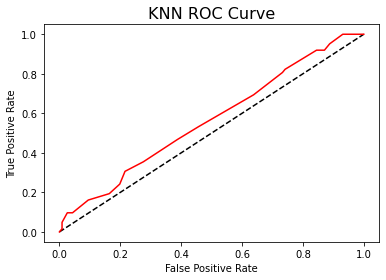

In [54]:
y_pred_prob = KN_classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='KNN',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve',fontsize=16)
plt.show()

## Adaboost

In [55]:
abc = AdaBoostClassifier()

In [56]:
params = {
    "n_estimators" : [10,15,20,50,80,90],
    "learning_rate" : [1, 2 ,5]
}

In [57]:
grid_search_abc = GridSearchCV(estimator=abc, param_grid=params)
grid_search_abc.fit(X_train,y_train)
abc_classifier = grid_search_abc.best_estimator_
print(abc_classifier)

AdaBoostClassifier(learning_rate=2, n_estimators=15)


In [58]:
abc_classifier.score(X_test,y_test)

0.797752808988764

In [59]:
y_pred_abc= abc_classifier.predict(X_test)

In [60]:
print(classification_report(y_pred_abc,y_test))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       116
           1       0.71      0.71      0.71        62

    accuracy                           0.80       178
   macro avg       0.78      0.78      0.78       178
weighted avg       0.80      0.80      0.80       178



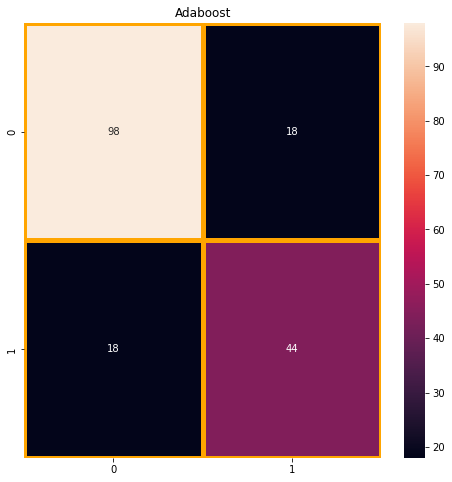

In [61]:
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(y_test,y_pred_abc),
           annot=True,fmt="d",linecolor="orange",linewidths=5)
plt.title("Adaboost")
plt.show()

In [62]:
abc_f1_score = f1_score(y_pred_abc,y_test, average="weighted")
abc_f1_score

0.7977528089887642

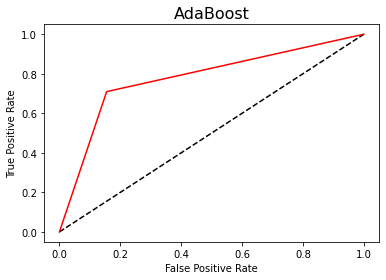

In [63]:
y_pred_prob = abc_classifier.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='AdaBoost',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost',fontsize=16)
plt.show()

# Finding best model:

In [64]:
Decision_tree = tree_f1_score
Random_forest = RF_f1_score
KNN = KN_f1_score
Logistic_regression= LR_f1_score
ABC = abc_f1_score

max = 0.5
L = [Decision_tree,Random_forest, KNN, Logistic_regression, ABC]
for x in L:
    if x > max:
        max = x


if Decision_tree == max:
    print(f'The best model is Decision tree  with score {max}')
elif Random_forest == max:
    print(f'The best model is Random_forest with score {max}')
elif ABC == max:
    print(f'The best model is SVC gaussian  with score {max}')
elif KNN == max:
    print(f'The best model is KNeighbors  with score {max}')
else:
    print(f'The best model is Logistic regression  with score {max}')

NameError: name 'KN_f1_score' is not defined

# PREDICTION

In [ ]:
test_data_set= pd.read_csv("test_data_features.csv")

In [ ]:
test_data_set.shape

In [ ]:
test_data_set.head(5)

In [ ]:
test_data_set[test_data_set.Parch_9 == 1]

In [ ]:
test_data_set.drop("Parch_9",axis=1, inplace=True)

In [ ]:
test_data_set.iloc[[342,365]]

In [ ]:
test_data_set.shape

In [ ]:
X_testdataset =test_data_set.to_numpy()

In [ ]:
result = RF_classifier.predict(X_testdataset)

In [ ]:
numpy_data = result
df = pd.DataFrame(data=numpy_data)

In [ ]:
df.to_csv("result.csv")

In [ ]:
result.value_counts()

In [ ]:
Counter(result)